# Milestone 1
Building on previous exercises, build an interactive application that asks the user a series of questions and then stores the user's answers for later analysis.

## Requirements
Your submission should include the following:
- A Chatbot that asks three users a series of at least three questions.
- Your chatbot should store the user's responses in a data structure, preferably a Pandas DataFrame, so that it can present a graphical analysis of the responses.
- Your chatbot should provide at least one visualization, such as a vertical bar chart, that provides a basic summary and analysis of the user input.

## Yunhan Yu's Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import random

### Create a Basic Chatbot

In [2]:
## Simple interactive chatbot
def chat_base(question):
    answer = input(question)
    return answer

### Initialize a DataFrame to Store User Input

In [3]:
data_store = pd.DataFrame()

### Run the Chatbot and Save Each User's Answers

In [13]:
## Simple interactive chatbot
user = chat_base("What's your name?")
print('I will ask a few questions. print Bye to quit.')
def ListenBot(question,user,data_store):
    user_responses = []
    positive = list(pd.read_csv("/Users/yunhan/Desktop/510INTE/Lab 1: Simple Chatbot/positive_words.txt", header=0).iloc[:,0].values)
    negative = list(pd.read_csv("/Users/yunhan/Desktop/510INTE/Lab 1: Simple Chatbot/negative_words.txt", header=0).iloc[:,0].values)
    positive_response = ["Great!","That's good","Cool!"]
    negative_response = ["Sorry to hear that","Womp, womp!"]
    netural_response = ["I see.","Ok","hmmmm"]
    answer = input(question+", %s?"%user)
    if answer == "Bye" or answer == "bye":
        new_response = {'user_name': user, 'question': question, 'response': answer}
        user_responses.append(new_response)
        new_data = pd.DataFrame(user_responses)
        data_store = pd.concat([data_store, new_data])
    else:
        answer = answer.translate(str.maketrans("","", string.punctuation)) #remove punctuation
        answer = answer.lower()
        word_answer = answer.split()
        positive_answer = 0
        negative_answer = 0
        for i in word_answer:
            if i in positive:
                positive_answer += 1 
            elif i in negative:
                negative_answer += 1
        if positive_answer > negative_answer:
            print(random.choice(positive_response))
        elif negative_answer > positive_answer:
            print(random.choice(negative_response))
        else:
            print(random.choice(netural_response))
        new_response = {'user_name': user, 'question': question, 'response': answer}
        user_responses.append(new_response)
        new_data = pd.DataFrame(user_responses)
        data_store = pd.concat([data_store, new_data])
    return data_store
data_store = ListenBot("Hi, how can I help you",user,data_store)
current_response = data_store[data_store["user_name"]==user]
if "bye" in current_response["response"].values or "Bye" in current_response["response"].values:
    print("Bye")
else:
    data_store = ListenBot("Where did you go today",user,data_store)
    if "bye" in current_response["response"].values or "Bye" in current_response["response"].values:
        print("Bye")
    else:
        data_store = ListenBot("Can you tell me more",user,data_store)
        print("Thanks for your response. I've made a note of it.")

What's your name?Ke
I will ask a few questions. print Bye to quit.
Hi, how can I help you, Ke?A great day
That's good
Where did you go today, Ke?GIX
Ok
Can you tell me more, Ke?Having a class there
Ok
Thanks for your response. I've made a note of it.


### View Cumulative Data

In [14]:
# data_store
data_store

,user_name,question,response
0,Yunhan,"Hi, how can I help you",im fine
0,Yunhan,Where did you go today,main campus
0,Yunhan,Can you tell me more,thats good
0,Yu,"Hi, how can I help you",good
0,Yu,Where did you go today,trade joes
0,Yu,Can you tell me more,i bought many things
0,Ke,"Hi, how can I help you",a great day
0,Ke,Where did you go today,gix
0,Ke,Can you tell me more,having a class there


### Analyze Data

<AxesSubplot:ylabel='Place people go today'>

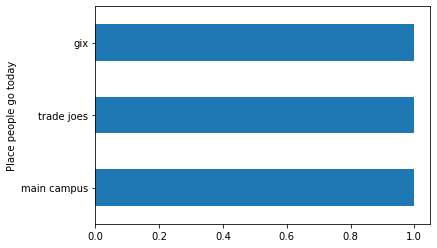

In [15]:
place = data_store[(data_store['question']=='Where did you go today')]
place['response'].value_counts().plot(kind='barh', xlabel="Place people go today")

## Be Creative!
Don't limit yourself to a simple Q&A. Feel free to explore things like the sentiment analysis that we did in Lab 1 by determining whether a user's input is positive or negative (remember the positive and negative word lists).